# Domácí úkol


## 1. Spinograf
- **Úkol : nakreslete obrázek trajektorie bodu na spinografu pro zadané hodnoty**
    - $ R $  (poloměr větší kružnice),
    - $ r $  (poloměr menší kružnice), a
    - $ d $  (vzdálenost bodu od středu menší kružnice).
- Rozmyslete si kolik rotací musí menší kružnice udělat, aby se bod vrátil do své původní pozice. (vykreslete dráhu tak, aby byla uzavřená)
- Vyzkoušejte alespoň pro $R=10, r=3, d=1$ a $R=7, r=2, d=5$.
- Vykreslete pomocí tenké modré čáry, zvolte dostatek bodů, aby byla trajektorie plynulá (hladká).

---

### Co je to spinograf?
Jedná se o hru/výukovou pomůcku (viz. https://en.wikipedia.org/wiki/Spirograph).

Pro vysvětlení trajektorie bodu na spinografu (často označovaného jako hypotrochoida, když se menší kružnice otáčí uvnitř větší kružnice) použijeme goniometrický popis polohy bodu na kružnici v závislosti na úhlu rotace. Máme jednu větší kružnici s poloměrem  $ R $  a jednu menší kružnici s poloměrem  $ r $ , a chceme trasovat dráhu bodu, který je od středu menší kružnice vzdálen o vzdálenost  $ d $ .


### Poloha středu menší kružnice

Střed menší kružnice se otáčí uvnitř větší kružnice. Poloha středu menší kružnice v závislosti na úhlu  $ \theta $  je dána parametrickými rovnicemi v kartézských souřadnicích:

-  $ X = (R - r)  \cos(\theta) $ 
-  $ Y = (R - r)  \sin(\theta) $ 

kde  $ \theta $  je úhel rotace středu menší kružnice v radiánech.

### Otočení menší kružnice

Menší kružnice se otočí (valí se po větší kružnici). Úhel, o který se menší kružnice otočila ve svém vlastním středu vzhledem k počátečnímu bodu, je dán délkou oblouku, který urazila:
$$ \theta R $$

pokud chceme tento oblouk vyjádřit vzhledem k úhlu otočení v radiánech, o který se otočila menší kružnice ve svém středu,  převádíme zpětně z obvodu na úhel:
$$ \theta \frac{ R}{r} $$
poslední dvě důležitá pozotování jsou:
- malá kružnice se otočí negativně (tedy úhel je záporný)
- malá kružnice se otočí zároveň se svým středem, tedy k úhlu otočení musíme přičíst úhel $\theta$

Celkově máme:

$$ \phi = \theta - \theta \frac{R}{r} = - \theta \frac{R-r}{r} $$


### Pozice bodu na spinografu

Nakonec, sloučíme pozici středu a relativní pozici bodu ve vzdálenosti $d$ od středu menší kružnice

-  $ x = X + d \cos(\phi) = (R - r) \cos(\theta) + d \cos(- \theta \frac{R-r}{r})$ 
-  $ y = X + d \sin(\phi) = (R - r) \sin(\theta) + d \sin(- \theta \frac{R-r}{r})$ 

Pokud použijeme vlastnosti (sudost/lichost) gonimetricých funkcí, můžeme tyto rovnice zjednodušit na:

$$ x = (R - r) \cos(\theta) + d \cos(\theta \frac{R-r}{r})$$
$$ y = (R - r) \sin(\theta) - d \sin(\theta \frac{R-r}{r})$$

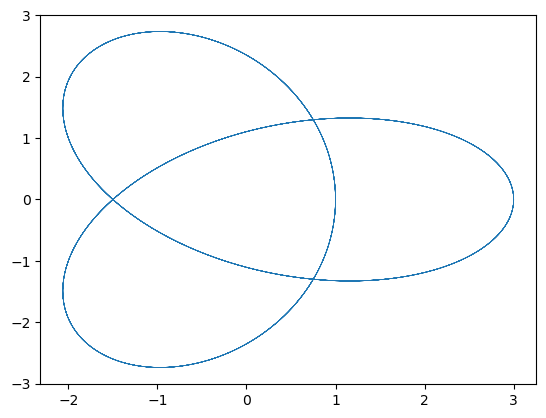

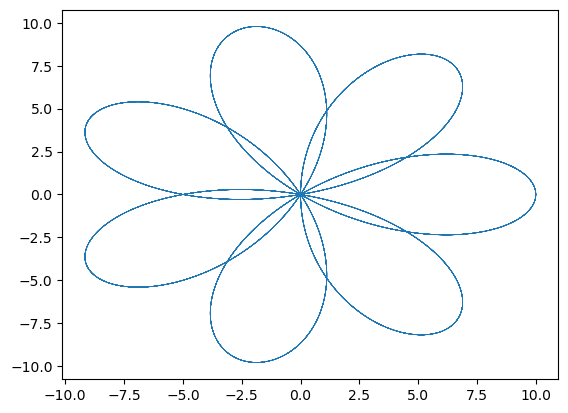

In [1]:
#TODO
import numpy as np
import matplotlib.pyplot as plt
import math

def spinograph(R, r, d):
    phi = np.linspace(0, math.lcm(R, r) * 2 * np.pi, math.lcm(R, r) * 360)
    x = (R - r) * np.cos(phi) + d * np.cos((R - r) / r * phi)
    y = (R - r) * np.sin(phi) - d * np.sin((R - r) / r * phi)
    plt.plot(x, y, linewidth=0.5)
    plt.show()
    
spinograph(6, 4, 1)
spinograph(7, 2, 5)

In [2]:
import math
math.lcm(60,40)

120

# 2. Prvočíselná spirála


**Část 1.: Vykreslení "slunečnicových bodů"**

- Vykreslete tzv. "slunečnicové body". Tedy prvních `N` takových bodů.
- Vykreslete je tak aby byl vzor dobře vidět (zvolte vhodné velikosti bodů)

##### Co jsou to slunečnicové body?
Poloměr $ r $ a úhel $ \theta $ pro každý bod (číslované přirozenými čísly: $n=1,...,N$) jsou určeny následovně:

1. Zlatý úhel $ \phi $ je dán vztahem:
$$
\phi = \pi \cdot (3 - \sqrt{5})
$$

2. Poloměr $ r $ je odvozen z indexu bodu $ n $ jako:
$$
r = \sqrt{n}
$$

3. Úhel $ \theta $ pro bod $ n $ je vypočítán jako:
$$
\theta = n \cdot \phi
$$

Každý bod je poté umístěn pomocí kartézských souřadnic $(x, y)$, které jsou vypočítány pomocí:
$$
x = r \cdot \cos(\theta)
$$
$$
y = r \cdot \sin(\theta)
$$

**Část 2.: Vykreslení prvočíselné spirály**
- Vykreslete prvočíselnou spirálu pro prvních `N` prvočísel.
- Jedná se o stejný vzor jako v případě "slunečnicových bodů", ale tentokrát vykreslíme pouze body, které odpovídají prvočíslům.


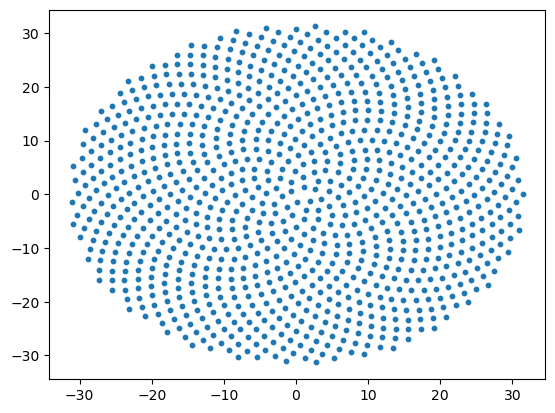

In [3]:
def sunflower_points(n):
    points = np.arange(1, n+1)
    phi = np.pi * (3 - np.sqrt(5))
    r = np.sqrt(points)
    theta = points * phi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

x, y = sunflower_points(1000)
plt.scatter(x, y, s=10)

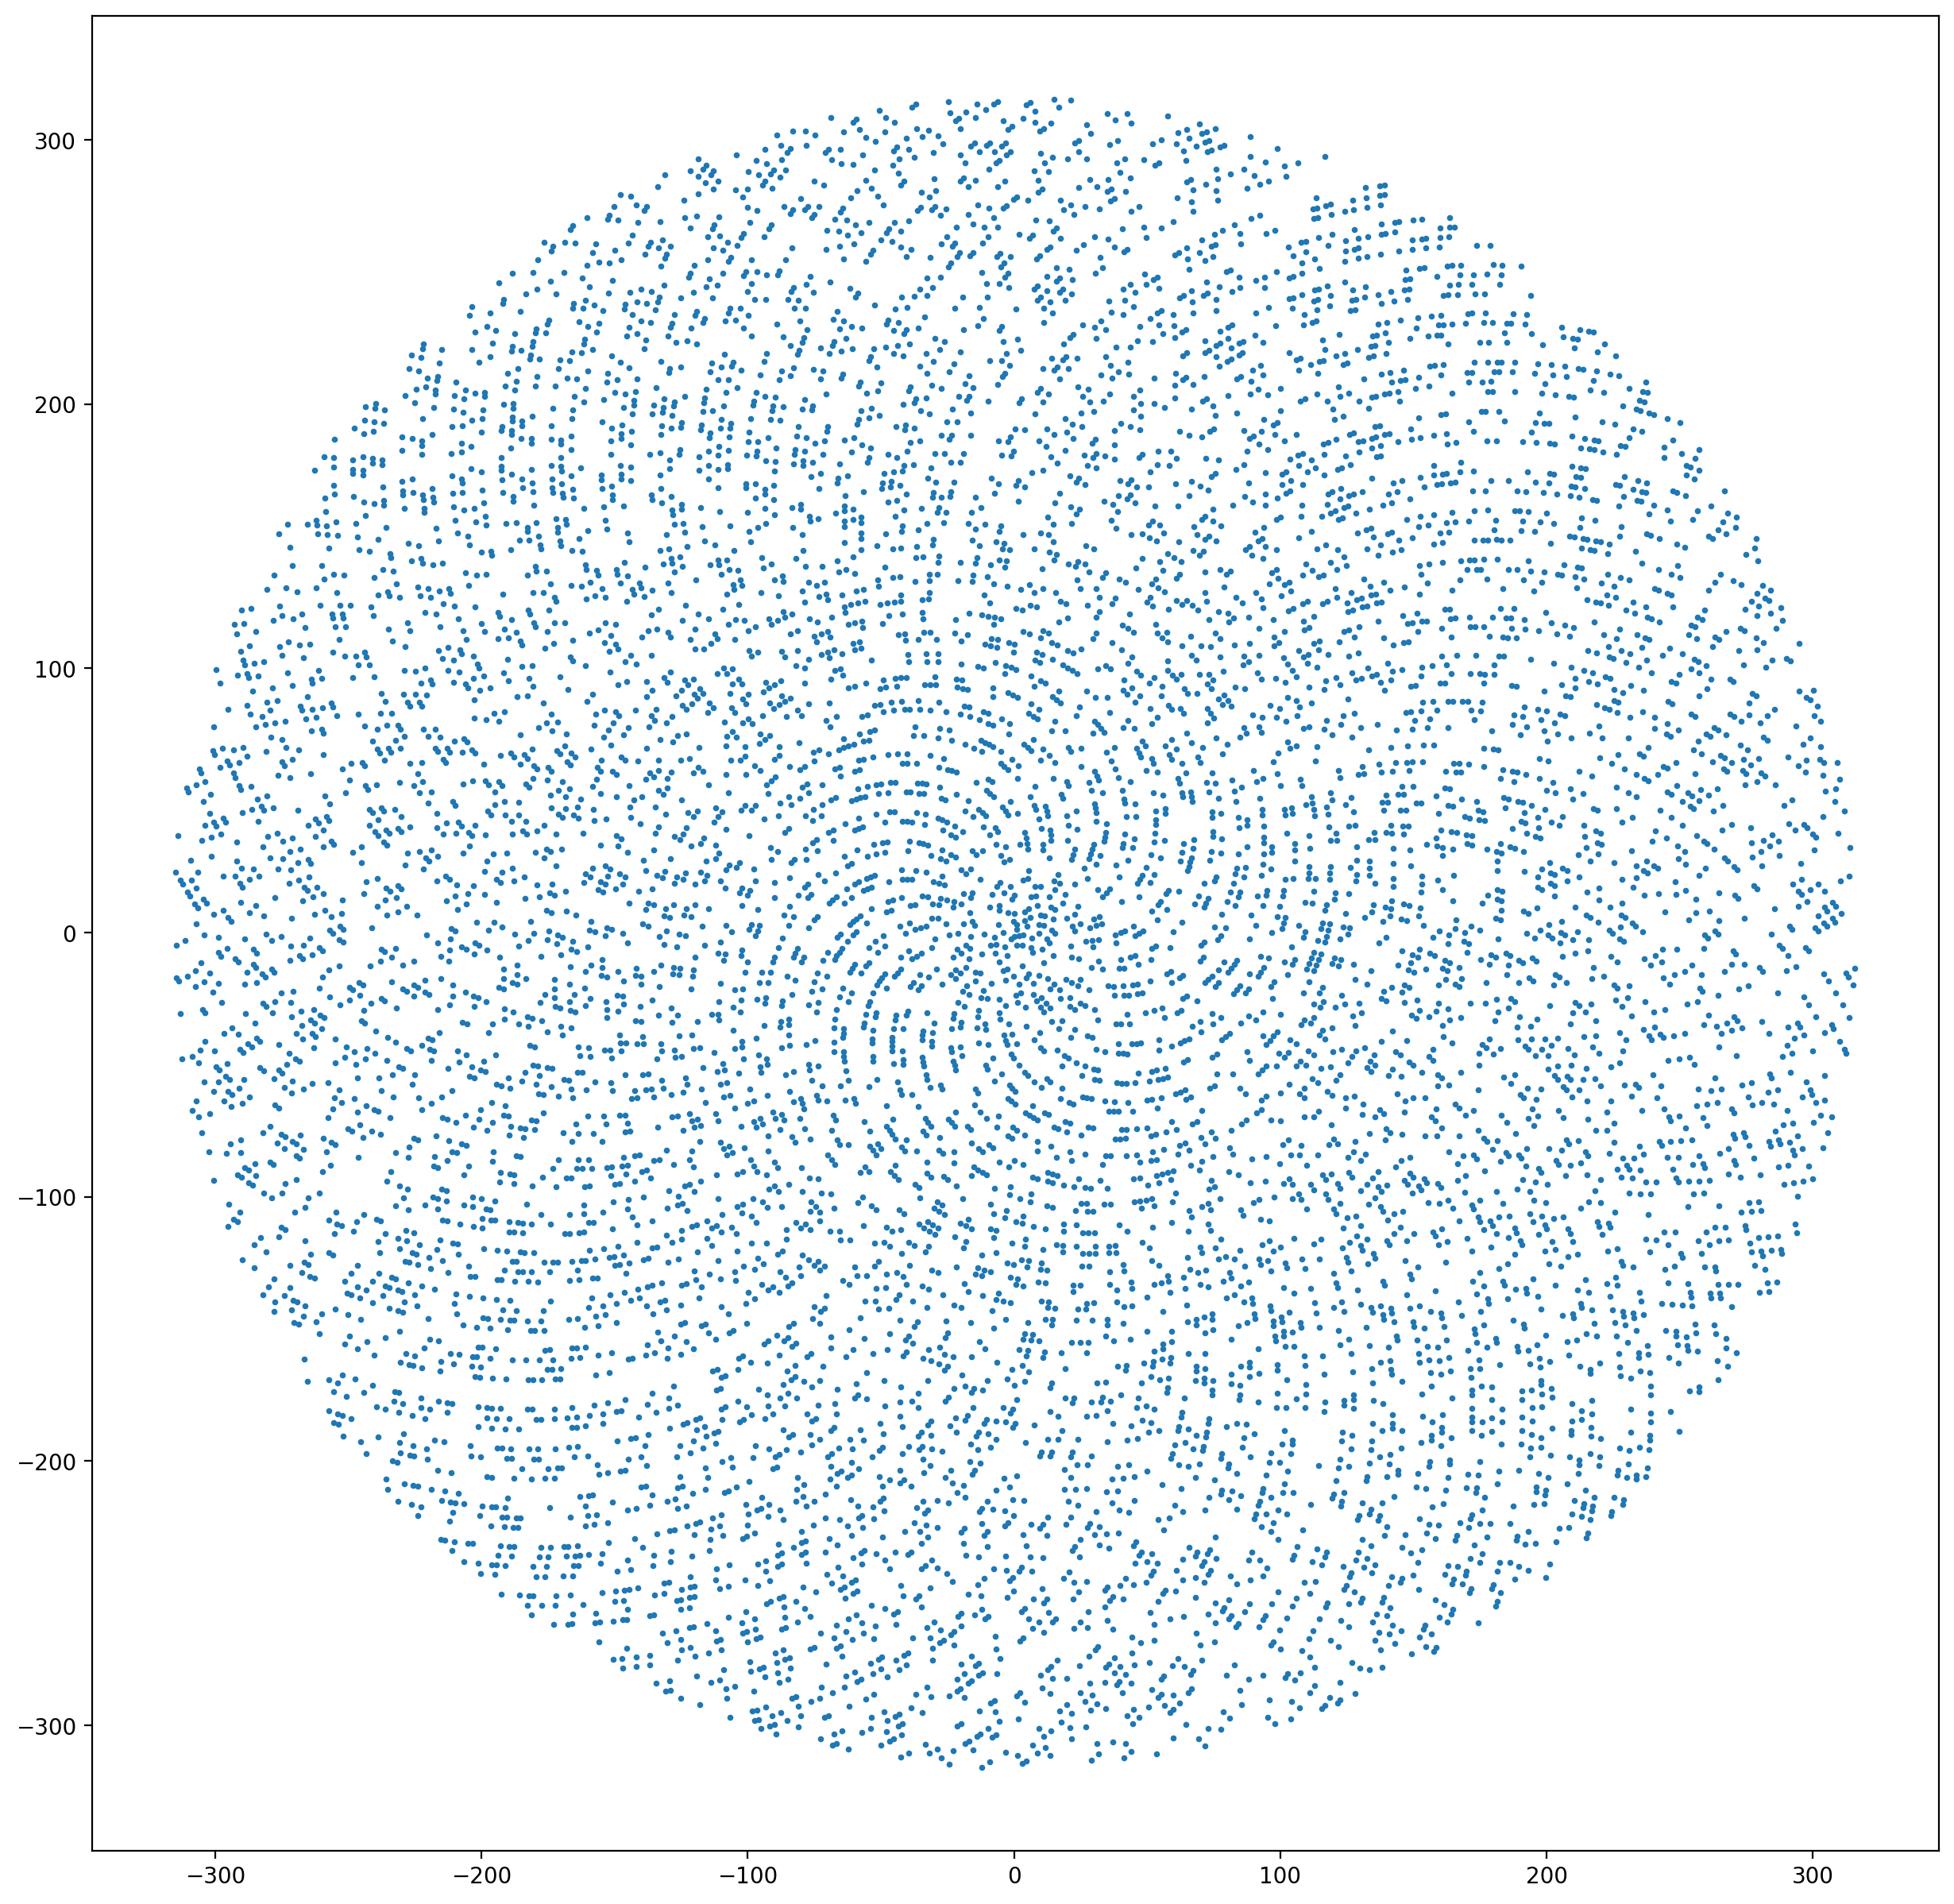

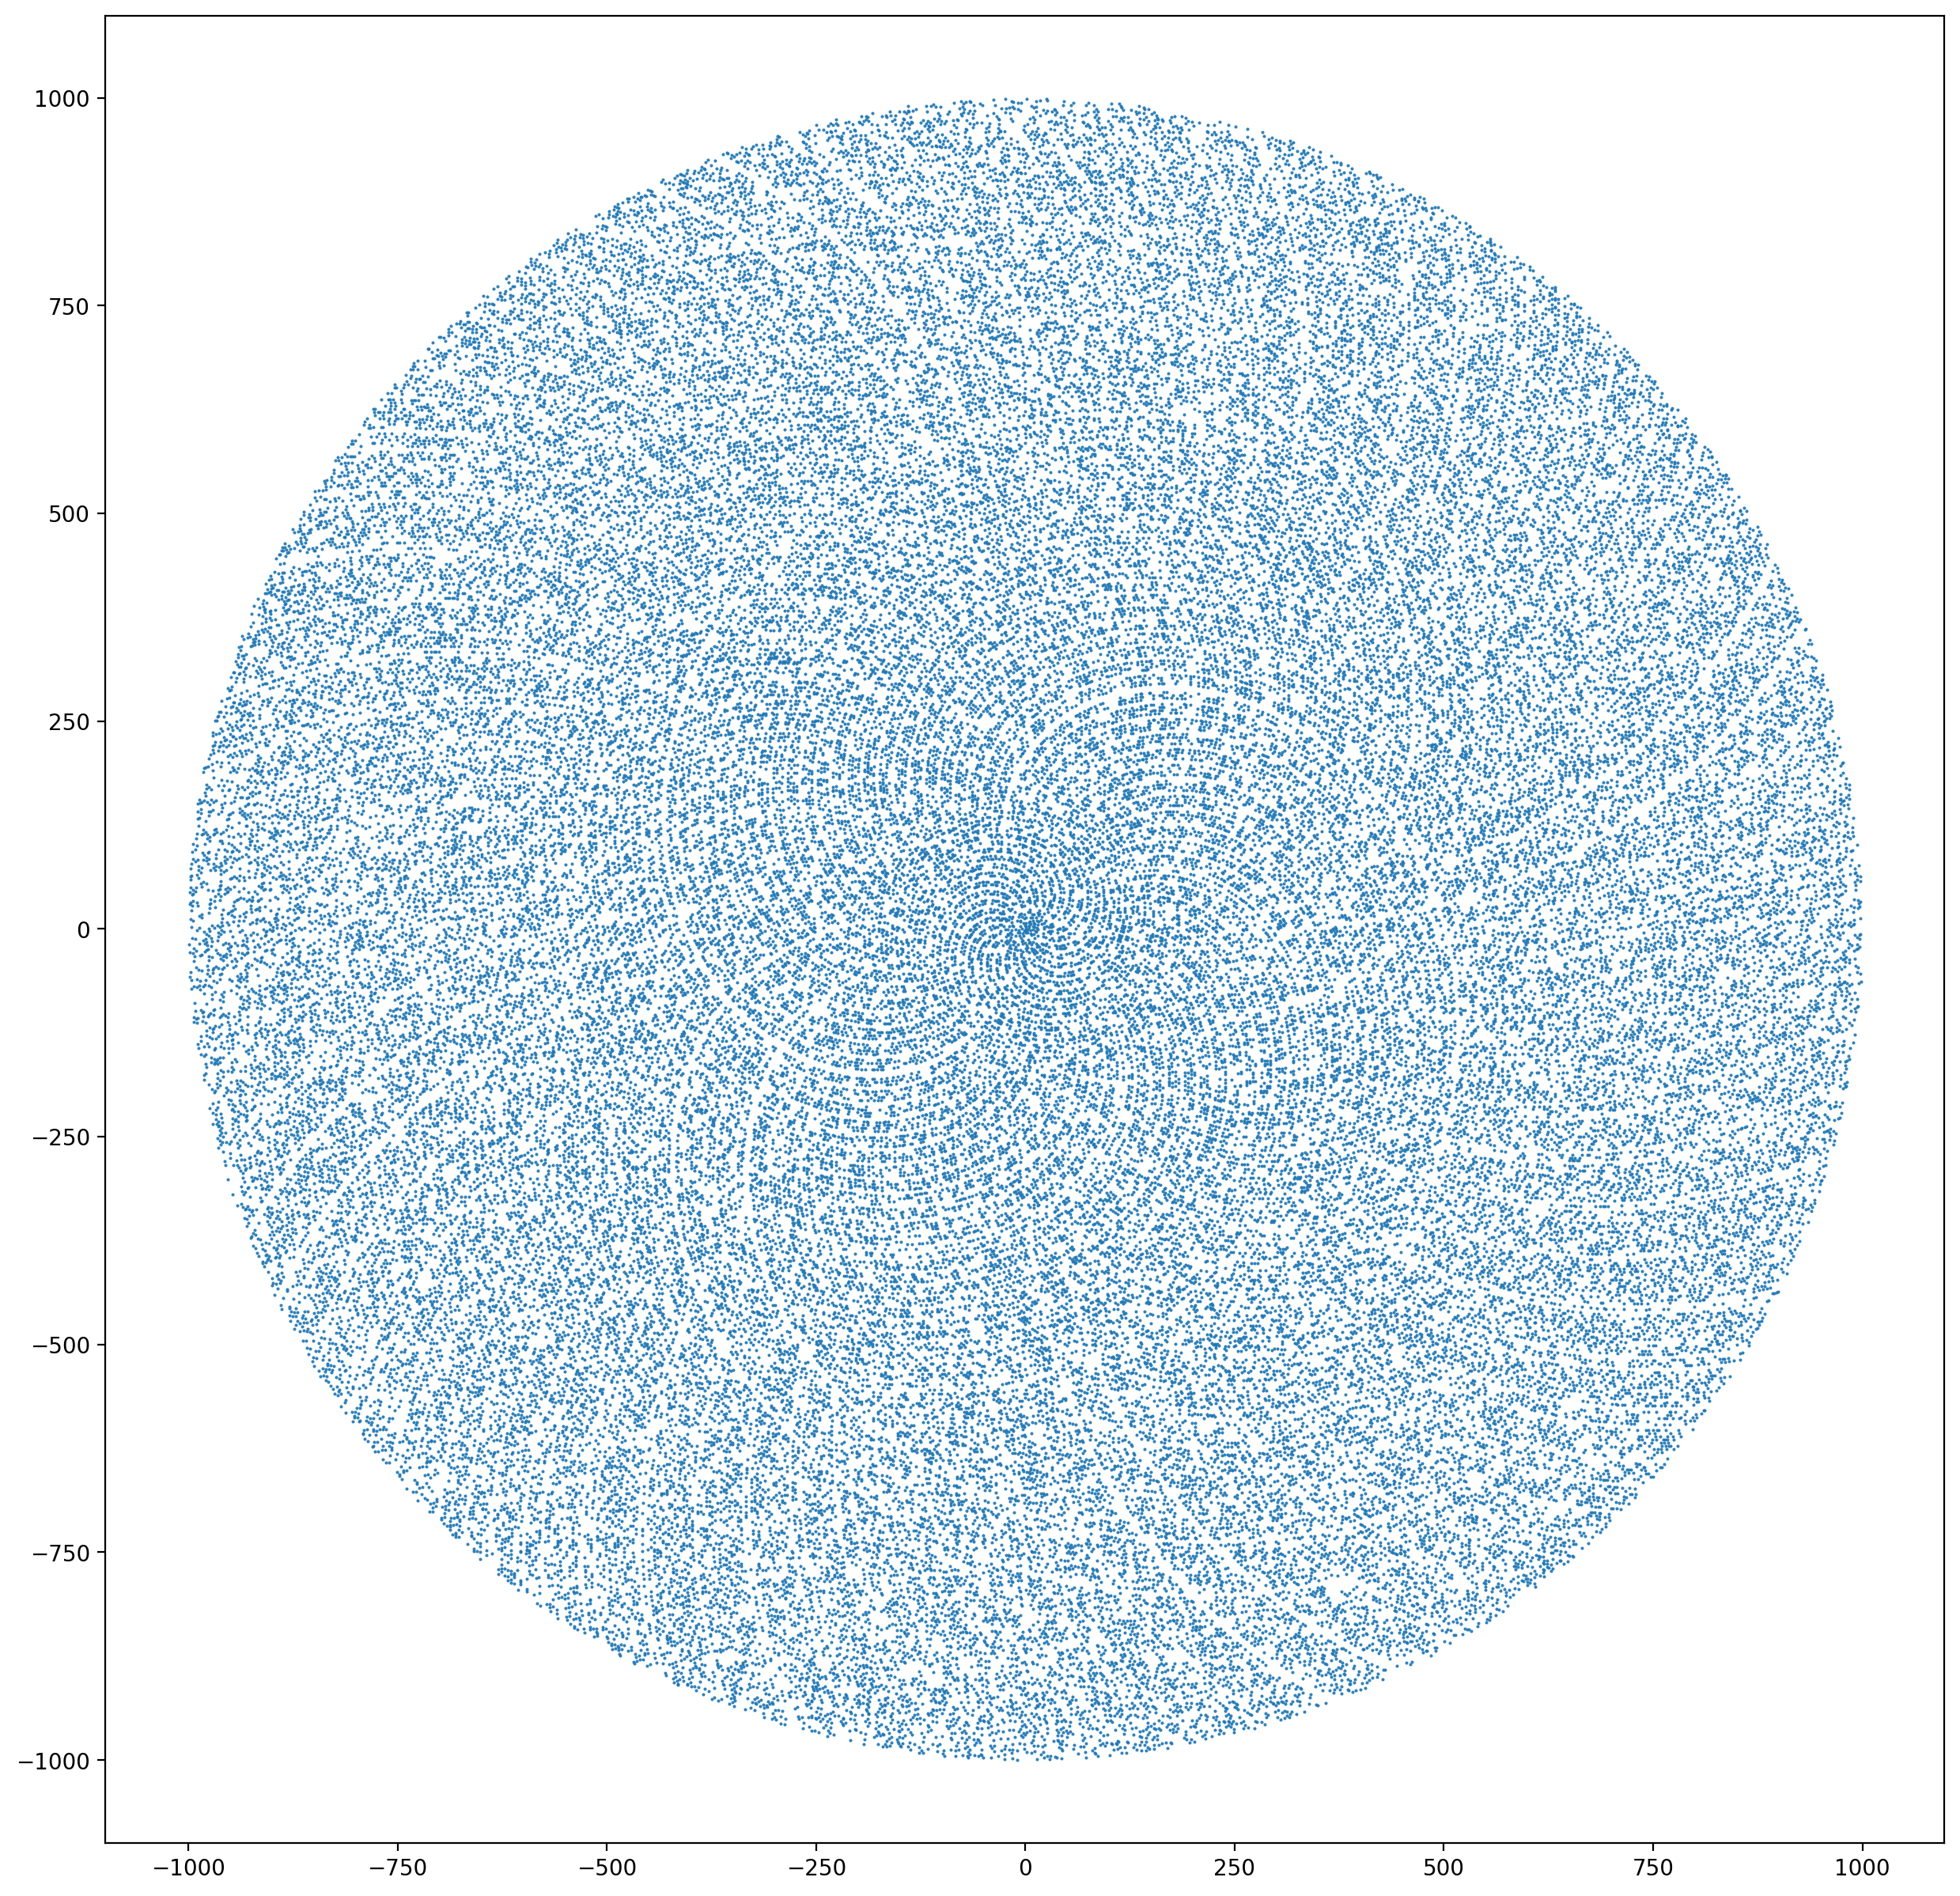

In [4]:
def eratosthenes_sieve(n):
    sieve = np.arange(1, n + 1)
    sieve[0] = 0
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i - 1] != 0:
            sieve[i**2 - 1:n:i] = 0
    return sieve

def prime_spiral(n):
    is_prime = eratosthenes_sieve(n) != 0
    x, y = sunflower_points(n)
    return x[is_prime], y[is_prime]

x, y = prime_spiral(100000)
plt.figure(figsize=(15, 15), dpi=200)
plt.scatter(x, y, s=3)

x, y = prime_spiral(1000000)
plt.figure(figsize=(15, 15), dpi=200)
plt.scatter(x, y, s=0.2)

# Bonusové úkoly
1. Modifikujte spinograf tak, aby menší kružnice:
    - se otáčela po vnější straně větší kružnice
    - se otáčela po rovnostraném n-úhelníku (trojúhelník, čtverec, šestiúhelník, ...)

In [5]:
math.lcm(100,1)

100

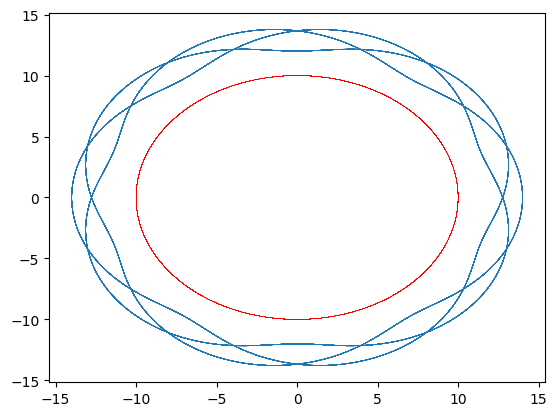

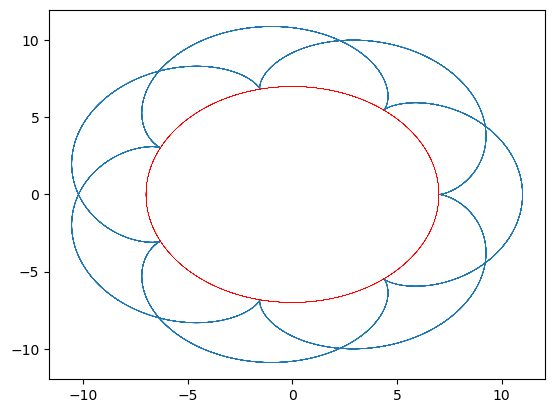

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math


def spinograph_outside(R, r, d):
    phi = np.linspace(0, math.lcm(R, r) * 2 * np.pi, math.lcm(R, r) * 360)
    x = (R + r) * np.cos(phi) + d * np.cos((R + r) / r * phi)
    y = (R + r) * np.sin(phi) + d * np.sin((R + r) / r * phi)
    plt.plot(x, y, linewidth=0.5)
    plt.plot(R * np.cos(phi), R * np.sin(phi), 'r', linewidth=0.1)
    plt.show()


spinograph_outside(10, 3, 1)
spinograph_outside(7, 2, 2)

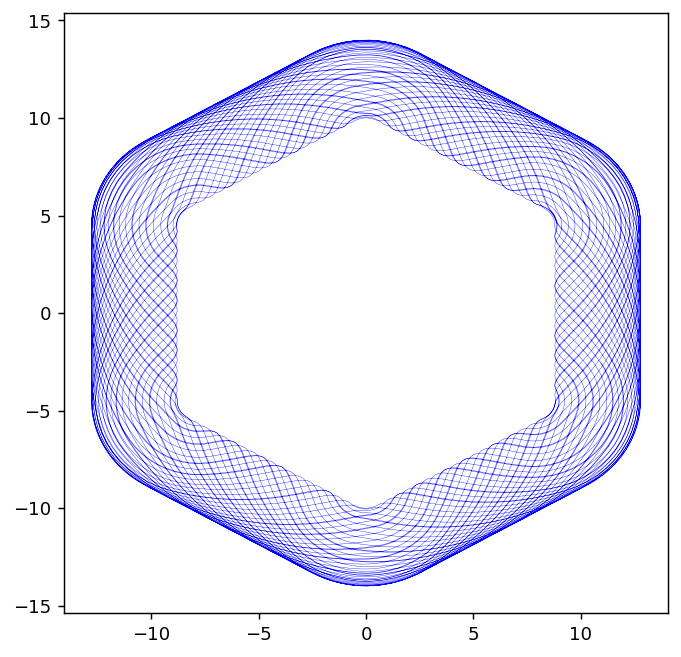

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def rotate_point(point, angle):
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    return np.dot(rotation_matrix, point)


def spinograph_ngon(n, R, r, d, rots=20, density=1000):
    """
    Computes spinograph over an n-sided polygon.

    Parameters:
    - n: Number of sides of the polygon.
    - R: Radius of the circumcircle of the polygon.
    - r: Radius of the moving circle.
    - d: Distance from the center of the moving circle to the drawing point.
    """
    side_ang = 2 * np.pi / n  # angle corresponding to the side of the polygon
    R_m = R * np.cos(side_ang / 2)  # radius of the inscribed circle
    side_len = R_m * np.tan(side_ang / 2) * 2  # length of the side

    ver = np.array([[R * np.cos(-side_ang / 2)], [R * np.sin(-side_ang / 2)]])  # starting vertex
    tan = np.array([[0], [1]])  # direction - tangent to the edge
    nor = (tan[::-1, :] * np.array([[1], [-1]]))  # normal to the edge
    ang_cir = 0.0  # angle of the moving circle at the starting vertex
    
    side_steps = np.linspace(0, side_len, density)[None, :]  # steps along the side
    ang_rot_ver = np.linspace(0, side_ang, int(density / 10))[None, :]  # steps of angle around the vertex

    all_ver_point = []  # list to store all points

    for edge in range(n * rots):
        # First part, rotating on edge
        ver_ngon = ver + tan * side_steps  # points on the edge
        ver_cen = ver_ngon + r * nor  # centers of the moving circle
        ang_point = ang_cir + side_steps / r  # angles of rotating point
        ver_point = ver_cen + d * np.vstack([np.cos(ang_point), np.sin(ang_point)])  # point at d
        all_ver_point.append(ver_point)  # save the points

        ang_cir += side_len / r  # update the angle of the moving circle after each edge
        ver += tan * side_len  # update the vertex to next one
        
        # Second part, rotating around the vertex of ngon
        ang_cen = ang_rot_ver + edge * side_ang  # centers of the moving circle
        ver_cen = ver + r * np.vstack([np.cos(ang_cen), np.sin(ang_cen)])  # centers
        ang_point = ang_rot_ver + ang_cir  # angles of rotating point
        ver_point = ver_cen + d * np.vstack([np.cos(ang_point), np.sin(ang_point)])  # point at d
        all_ver_point.append(ver_point)  # save the points
        
        # Update for next edge
        ang_cir += side_ang  # update the angle of the moving circle after each vertex rotation
        tan = rotate_point(tan, side_ang)  # rotate the tangent to be tangent to the next edge
        nor = (tan[::-1, :] * np.array([[1], [-1]]))  # update the normal to the edge
        
    x, y = np.hstack(all_ver_point)  # extract x and y coordinates from all points
    return x, y


# Example usage:
x, y = spinograph_ngon(n=6, R=9.0, r=3.0, d=2.0, rots=50, density=100)

fig = plt.figure(figsize=(6,6), dpi=130)
ax = fig.add_subplot(111)
ax.plot(x, y, 'b', linewidth=0.2)
plt.show()

In [8]:
import matplotlib.pyplot as plt
from ipywidgets import interactive


def plot_spinograph(n=6, R=9.0, r=3.0, d=2.0, rots=10):
    x, y = spinograph_ngon(n, R, r, d, rots, density=100)
    fig = plt.figure(figsize=(6, 6), dpi=130)
    ax = fig.add_subplot(111)
    ax.plot(x, y, 'b', linewidth=0.1)
    plt.show()


interactive_plot = interactive(
    plot_spinograph, 
    n=(1, 20, 1), 
    R=(0, 100, 0.01), 
    r=(0, 100, 0.01), 
    d=(0, 200, 0.1), 
    rots=(1, 1000, 1))
interactive_plot

interactive(children=(IntSlider(value=6, description='n', max=20, min=1), FloatSlider(value=9.0, description='…